In [29]:
# импорт всех необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [30]:
#чтение данныx
df = pd.read_csv("dataframe.csv")
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN


In [31]:
columns = list(df.columns)
print(columns)
df = df.drop(['author', 'author_type', 'deal_type', 'url','accommodation_type', 'phone','house_number' ], axis=1)
columns = list(df.columns)
print(columns)

['author', 'author_type', 'url', 'location', 'deal_type', 'accommodation_type', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'year_of_construction', 'object_type', 'have_loggia', 'parking_type', 'house_material_type', 'heating_type', 'finish_type', 'living_meters', 'kitchen_meters', 'phone', 'ceiling_height', 'district', 'street', 'house_number', 'underground', 'residential_complex']
['location', 'deal_type', 'accommodation_type', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'year_of_construction', 'object_type', 'have_loggia', 'parking_type', 'house_material_type', 'heating_type', 'finish_type', 'living_meters', 'kitchen_meters', 'ceiling_height', 'district', 'street', 'house_number', 'underground', 'residential_complex']


<Axes: >

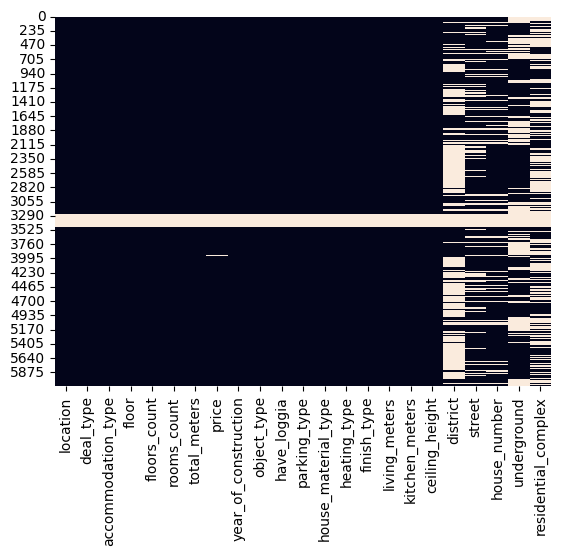

In [32]:
sns.heatmap(df.isnull(), cbar=False)


In [33]:
# убираем

In [34]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [35]:
missing_percent = get_numerical_summary(df)

location : 216 (3.539%)
deal_type : 216 (3.539%)
accommodation_type : 216 (3.539%)
floor : 216 (3.539%)
floors_count : 216 (3.539%)
rooms_count : 216 (3.539%)
total_meters : 216 (3.539%)
price : 229 (3.752%)
year_of_construction : 216 (3.539%)
object_type : 216 (3.539%)
have_loggia : 216 (3.539%)
parking_type : 216 (3.539%)
house_material_type : 216 (3.539%)
heating_type : 216 (3.539%)
finish_type : 216 (3.539%)
living_meters : 216 (3.539%)
kitchen_meters : 216 (3.539%)
ceiling_height : 216 (3.539%)
district : 3555 (58.24%)
street : 1475 (24.164%)
house_number : 1108 (18.152%)
underground : 2081 (34.092%)
residential_complex : 3134 (51.343%)


In [36]:
df_cleaned = df.dropna(thresh=2)

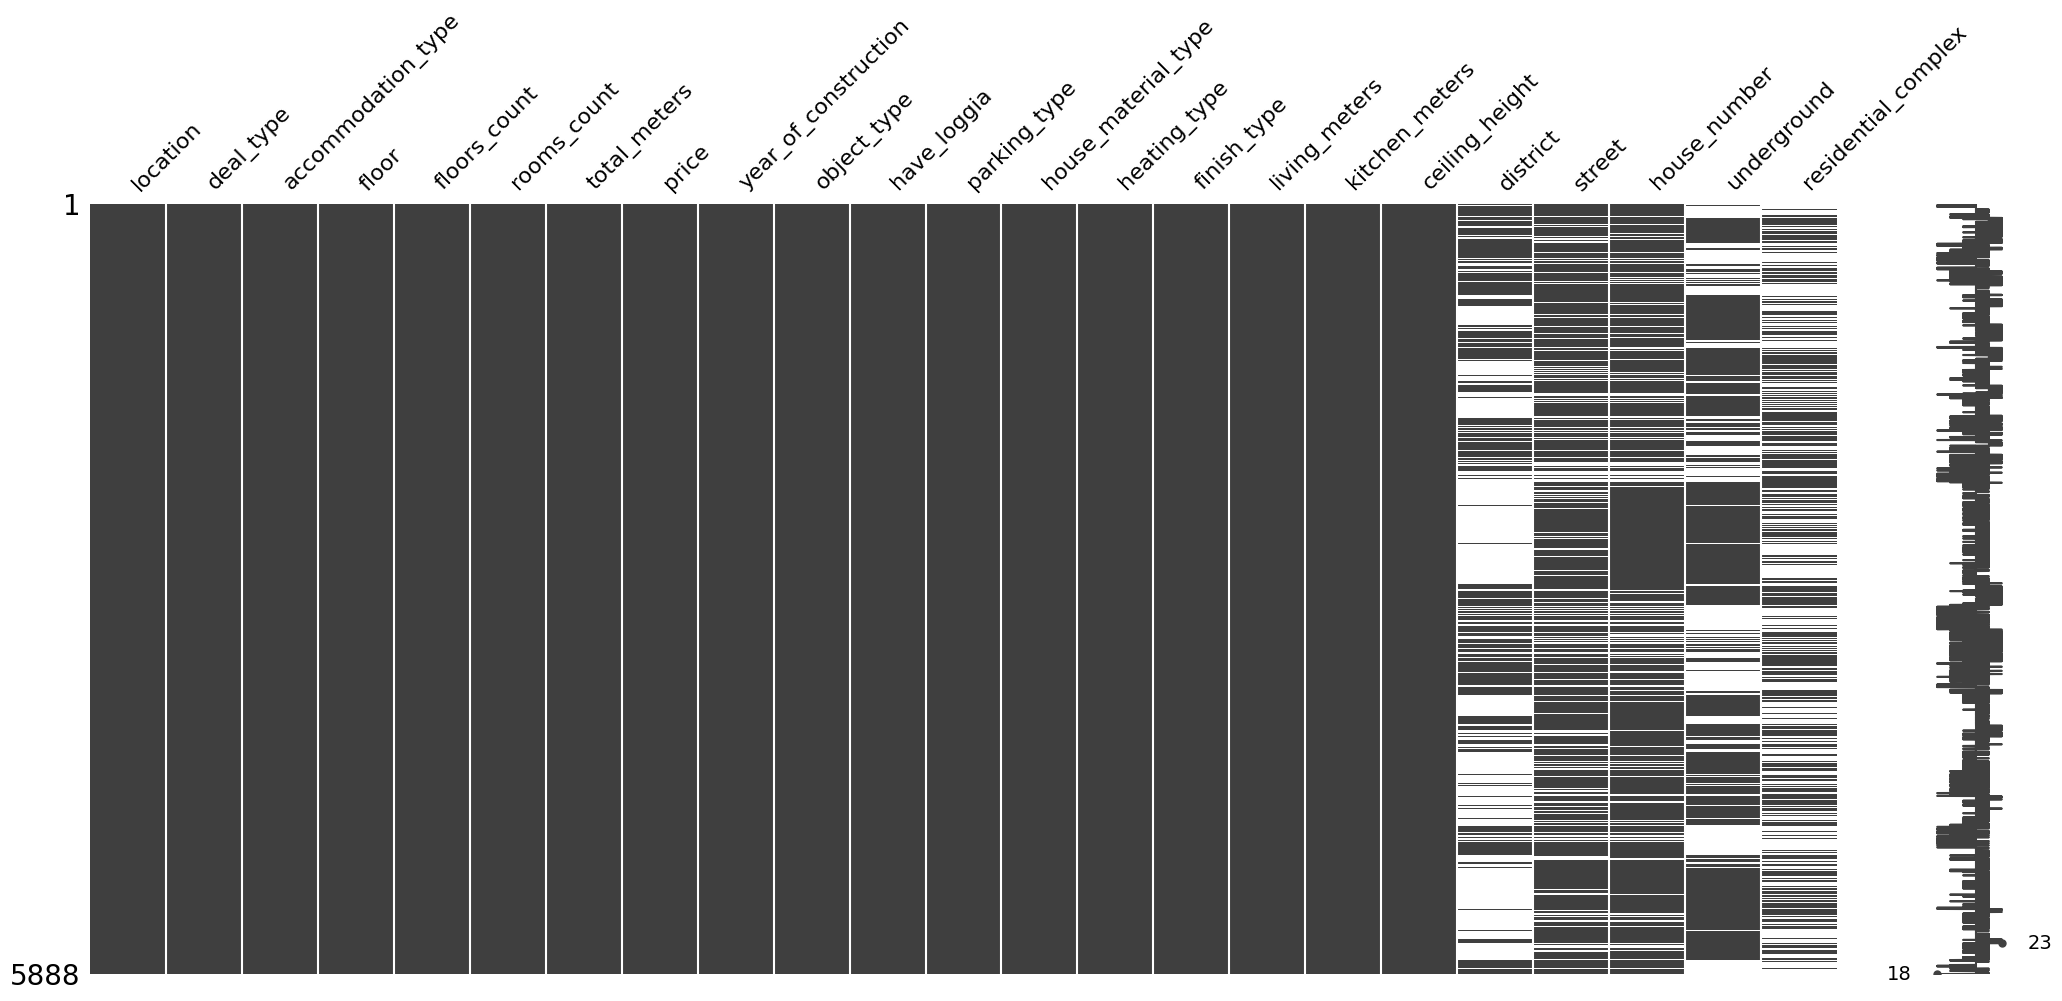

<Figure size 2000x1500 with 0 Axes>

In [37]:
msno.matrix(df_cleaned)
plt.figure(figsize=(20,15))
plt.show()